In [153]:
# Initialize Otter
import otter
grader = otter.Notebook("q1.ipynb")

# Qiskit Assignment 1
## Single Qubit Circuits

### Learning Objectives
1. Build Pauli gates from Qiskit's U gate
2. Use the U gate to reverse a series of operations
3. Work with various rotations on the bloch sphere
4. Understand IBM's circuit transpilation process

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do write your own solutions. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: Sam Schwartz

**STUDENT ID**: 488082

In [154]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.circuit.random import random_circuit
import numpy as np
import pprint
import random

#### Task 1 - Constructing Pauli Z gate from u Gate (10 pts)
We can use [Qiskit's U Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.u.html#qiskit.circuit.QuantumCircuit.u) to construct arbitrary quantum operations. Fill in the function below to return a circuit with
- 1 qubit, [initialized](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html#qiskit.circuit.QuantumCircuit.initialize) to the parameter `initial_state`
- 1 classical bit
- a U gate with parameters which perform the same rotation as a Pauli Z gate
- a measurement following the rotation

Note: Your solution may not include the Qiskit Z gate.

In [155]:
def qc_pauli_z(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state, 0)
    ## Z = [1,0
        ## 0,-1]
    qc.u(0,0,np.pi,0)
    qc.measure([0],[0])
    return qc

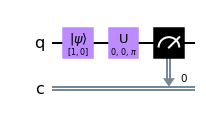

In [156]:
qc_pauli_z().draw(output='mpl')

In [157]:
grader.check("Task 1")

Task 1 results: All test cases passed!

#### Task 2 (2A, 2B, 2C) - Unitary Inverse Puzzles (30 pts)

We'll study the idea of [uncomputation](https://qiskit.org/textbook/ch-algorithms/grover.html#5.2-Uncomputing,-and-Completing-the-Oracle) during our discussion of quantum algorithms. In general, we may find it helpful to return a qubit to its initial state. 

This process is typically straightforward due to the properties of unitary gates. However, your task is to do so using a single U gate. Complete the partial circuits below such that the measurements yield a state equivalent to `initial_state` *up to a global phase*.

#### Task 2A

In [158]:
def reverse_a(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    qc.x(0) ## 0,1
    qc.h(0) ## 1/rt(2) , -1/rt(2)
    qc.y(0) ## -1/rt(2), -1/rt(2)
    qc.x(0) ## -1/rt(2), -1/rt(2)
    qc.z(0) ## -1/rt(2) , 1/rt(2)
    qc.barrier()
    qc.u(np.pi * (3/2), np.pi, np.pi, 0)
    qc.barrier()
    qc.measure(0,0)
    
    return qc

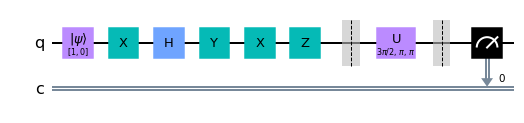

In [159]:
reverse_a().draw(output='mpl')

In [160]:
grader.check("Task 2A")

Task 2A results: All test cases passed!

#### Task 2B

In [233]:
def reverse_b(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    for i in range(5):
        qc.x(0) 
        qc.y(0) 
        qc.z(0) 
        qc.h(0)
    qc.barrier()
    qc.u(np.pi*(1/2), 0, np.pi, 0 )
    qc.barrier()
    qc.measure(0,0)
    return qc

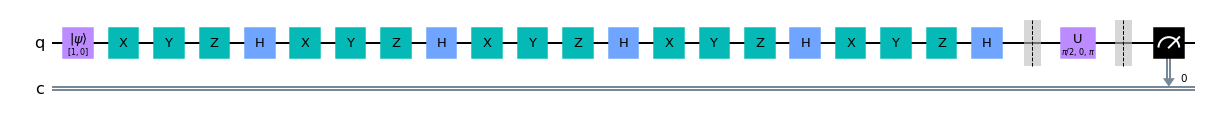

In [234]:
reverse_b().draw(output='mpl')

In [235]:
grader.check("Task 2B")

Task 2B results: All test cases passed!

#### Task 2C

**Hint**: The P gate generalizes rotation about the Z-axis to an arbitrary angle $\phi$, where
$P(\phi)=\begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix}$

In [641]:
def reverse_c(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    qc.x(0)
    for i in range(1,6):
        qc.p((-1)**(i)*np.pi/(2**i), 0)
    qc.z(0)
    qc.barrier()
    ## e^-11pi(i)/32
    qc.u(-1*np.pi,0,(11/32)*np.pi,0)

    qc.barrier()
    qc.measure(0,0)
    return qc

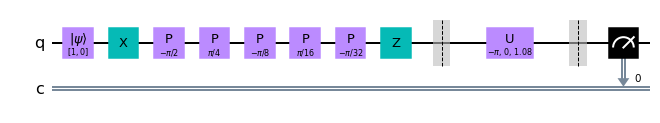

In [639]:
reverse_c().draw(output='mpl')

In [640]:
grader.check("Task 2C")

Task 2C results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Task 3 (3A, 3B, 3C) - Using Rotation to Obtain Probabilities (30 pts)

#### Task 3A 
Fill in the function below to return a single-qubit circuit such that
- the probability of seeing $|1\rangle$ on measurement is `0.25`
- your circuit only uses gates from the following list: X, Y, Z, P, H, U

Verify your solution over `1024` trials and plot the results in a histogram.

In [506]:
def qc_rot_a():
    qc =QuantumCircuit(1,1)
    state1 = [0,1]
    qc.initialize(state1,0)
    #qc.h(0)
    qc.u(np.pi*1/3,0,np.pi,0)
    qc.x(0)
    qc.measure([0],[0])
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1024)
    plot_histogram(job.result().get_counts())
    return qc

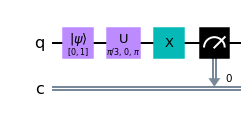

In [507]:
qc_rot_a().draw(output='mpl')


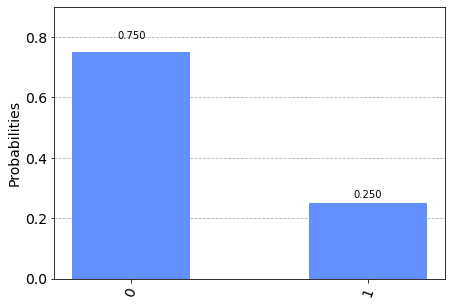

In [509]:
    qc = QuantumCircuit(1,1)
    state1 = [0,1]
    qc.initialize(state1,0)
    #qc.h(0)
    qc.u(np.pi*1/3,0,np.pi,0)
    qc.x(0)
    qc.measure([0],[0])
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1024)
    plot_histogram(job.result().get_counts())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 3B - Rotation Operator Gates
This time, fill in the function below to return a single-qubit circuit such that
- the probability of seeing $|0\rangle$ on measurement is `0.75`
- your circuit only uses gates from the following list: [RX, RY, RZ](https://en.wikipedia.org/wiki/Quantum_logic_gate#Rotation_operator_gates)

Again, verify your solution over `1024` trials and plot the results in a histogram.

In [668]:
def qc_rot_b():
    qc =QuantumCircuit(1,1)
    state0 = [1,0]
    qc.initialize(state0,0)
    qc.rx(np.pi*1/3,0)
    qc.measure([0],[0])
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1024)
    plot_histogram(job.result().get_counts())
    return qc

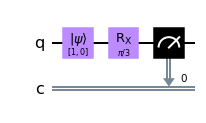

In [669]:
qc_rot_b().draw(output='mpl')

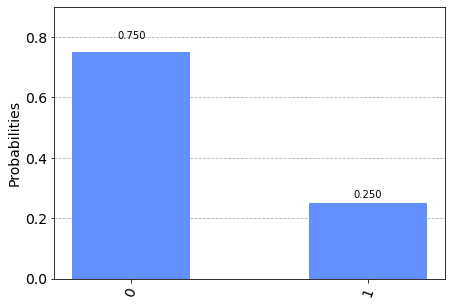

In [674]:
    qc =QuantumCircuit(1,1)
    state0 = [1,0]
    qc.initialize(state0,0)
    qc.rx(np.pi*1/3,0)  
    qc.measure([0],[0])
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1024)
    plot_histogram(job.result().get_counts())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 3C
Suppose we apply a Z gate to your circuit from task 3B just before measuring. How will the probability of seeing $|0\rangle$ change from that of the original circuit? Does the modified circuit produce a state equivalent to the original circuit up to a global phase?

The probability of seeing |0> will not change from that of the original circuit. Yes, the modified circuit does produce an equivalent state to the original circuit, |0> and |1> are both not affected (up to global phase change) by a Z gate.

<!-- END QUESTION -->

#### Task 4 - P vs. RZ (10 pts)
In task 2C, the P gate was introduced, and in lecture and task 3B, you've seen the RZ gate. Both are related to Z-axis rotations, but what utility is there to having each? Is there a mathematical relationship between them? If so, describe it. 

Feel free to use any resources for your research, including `lecture 6: A single qubit`.

Up to a global phase of e^(i(pi/2)) these gates are equivalent. The P gate is essentially a more flexible version of the RZ gate, so it's easier to modify it to mirror other gates (similar to the U-gate).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 5 (5A, 5B) - Transpiling Circuits (20 pts)
When you submit a job to IBM, the quantum computer will most likely run a different circuit than you built. This is because the hardware is capable of performing a very limited set of operations relative to the number of unitary gates. For IBM devices, the transpile step reduces all single-qubit operations to I, X, [SX](https://qiskit.org/documentation/stubs/qiskit.circuit.library.SXGate.html), and RZ ([source](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#7.-The-U-gate--)).

#### Task 5A
- Choose an IBM quantum computer.
- Use the [transpile](https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html) method to optimize the given circuit for the backend.
- Draw the transpiled circuit.

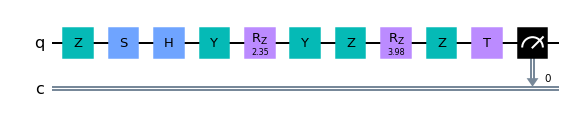

In [696]:
qc_rand = random_circuit(1, 10, measure=True, seed=6)
qc_rand.draw(output='mpl')
#provider = IBMQ.get_provider(hub='ibm-q')
#for backend in provider.backends():
#    status = backend.status().to_dict()
#    if status['operational'] and status['status_msg'] == 'active':
#        if 'simulator' not in status['backend_name']:
#            print(pprint.pformat(status))
#ibmqc = provider.get_backend('ibmq_armonk')
#q = transpile(qc_rand,ibmqc)
#q.draw(output='mpl')
#print("Check job status here:", "https://quantum-computing.ibm.com/jobs/" + job.job_id())

In [1]:
#IBMQ.load_account()
qc_rand = random_circuit(1, 10, measure=True, seed=6)
qc_rand.draw(output='mpl')
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    status = backend.status().to_dict()
    if status['operational'] and status['status_msg'] == 'active':
        if 'simulator' not in status['backend_name']:
            print(pprint.pformat(status))
ibmqc = provider.get_backend('ibmq_armonk')
q = transpile(qc_rand,ibmqc)
q.draw(output='mpl')
print("Check job status here:", "https://quantum-computing.ibm.com/jobs/" + job.job_id())

NameError: name 'random_circuit' is not defined

There is one root(x) gate and one Rz gate used in the transpiled circuit

<!-- END QUESTION -->

## Conclusion

Next up: the EV bomb!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [697]:
grader.check_all()

Task 1 results: All test cases passed!

Task 2A results: All test cases passed!

Task 2B results: All test cases passed!

Task 2C results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)